In [2]:
import pandas as pd

df = pd.read_csv('Data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Tiền xử lý và chia dữ liệu thành tập train và test

In [3]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=0)

Khởi tạo mạng nơ ron phân loại nhị phân

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 29))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\Richard Nguyen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

Tiến hành huấn luyện mạng nơ ron

In [5]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - accuracy: 0.9988 - loss: 0.0363 - val_accuracy: 0.9994 - val_loss: 0.0057
Epoch 2/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step - accuracy: 0.9994 - loss: 0.0064 - val_accuracy: 0.9992 - val_loss: 0.0245
Epoch 3/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - accuracy: 0.9994 - loss: 0.0129 - val_accuracy: 0.9993 - val_loss: 0.0098
Epoch 4/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step - accuracy: 0.9992 - loss: 0.0098 - val_accuracy: 0.9992 - val_loss: 0.0083
Epoch 5/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 695us/step - accuracy: 0.9994 - loss: 0.0071 - val_accuracy: 0.9992 - val_loss: 0.0201
Epoch 6/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - accuracy: 0.9993 - loss: 0.0105 - val_accuracy: 0.9993 - val_loss: 0.0049
Epoch 7/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 700us/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0104
Epoch 8/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 700us/step - accuracy: 0.9993 -

Vẽ biểu đồ so sánh tập train và test

[]

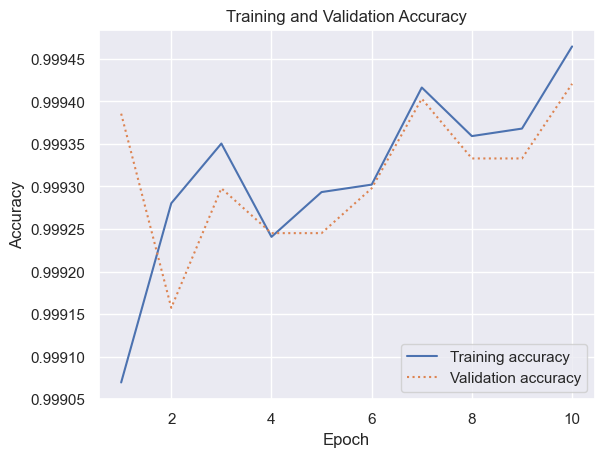

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Sử dụng ma trận nhầm lẫn

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step


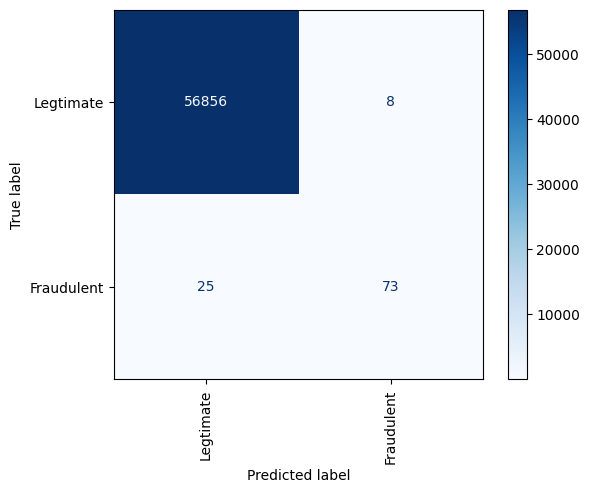

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()

y_predicted = model.predict(x_test) > 0.5
labels = ['Legtimate', 'Fraudulent']

cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')

Vì tập dữ liệu của chúng ta bị mất cân bằng khá nặng cho nên vì thế ta có thể thêm một số các siêu tham số cho hàm huấn luyện.

In [12]:
# hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10,
#                  batch_size=100, class_weight={ 0: 1.0, 1: 0.01 })